# PyCaret Tutorial

When approaching supervised machine learning problems, it can be tempting to just see how a random forest or gradient boosting model performs and stop experimenting if satisfied with the results. What if you could compare many different models with just one line of code? What if you could reduce each step of the data science process from feature engineering to model deployment to just a few lines of code?

This is exactly what [pycaret](https://pycaret.org/) provides. PyCaret is a high-level, low-code Python library that makes it easy to compare, train, evaluate, tune, and deploy machine learning models with only a few lines of code. At its core, PyCaret is basically just a large wrapper over many data science libraries such as Scikit-learn, Yellowbrick, SHAP, Optuna, and Spacy. Yes, you could use these libraries for the same tasks, but if you don’t want to write a lot of code, PyCaret could save you a lot of time.

If you want to see more tutorials, `pycaret` provides them [here](https://pycaret.readthedocs.io/en/latest/tutorials.html).


# Installing PyCaret

PyCaret is a large library with a lot of dependencies. Recommend creating a virtual environment specifically for PyCaret using Conda so that the installation does not impact any of your existing libraries. To create and activate a virtual environment in Conda, run the following commands:

`conda create --name pycaret_env python=3.6`
`conda activate pycaret_env`

To install the default, smaller version of PyCaret with only the required dependencies, you can run the following command.

`pip install pycaret` or `conda install -c conda-forge pycaret`

To install the full version of PyCaret, you should run the following command instead.

`pip install pycaret[full]`

An option is to deactivate the virtual environment and then add it to Jupyter with the following commands.

`conda deactivate`
`python -m ipykernel install --user --name pycaret_env --display-name "pycaret_env"`

Now, after launching a Jupyter Notebook/Lab in your browser, you should be able to see the option to change your environment to the one you just created.

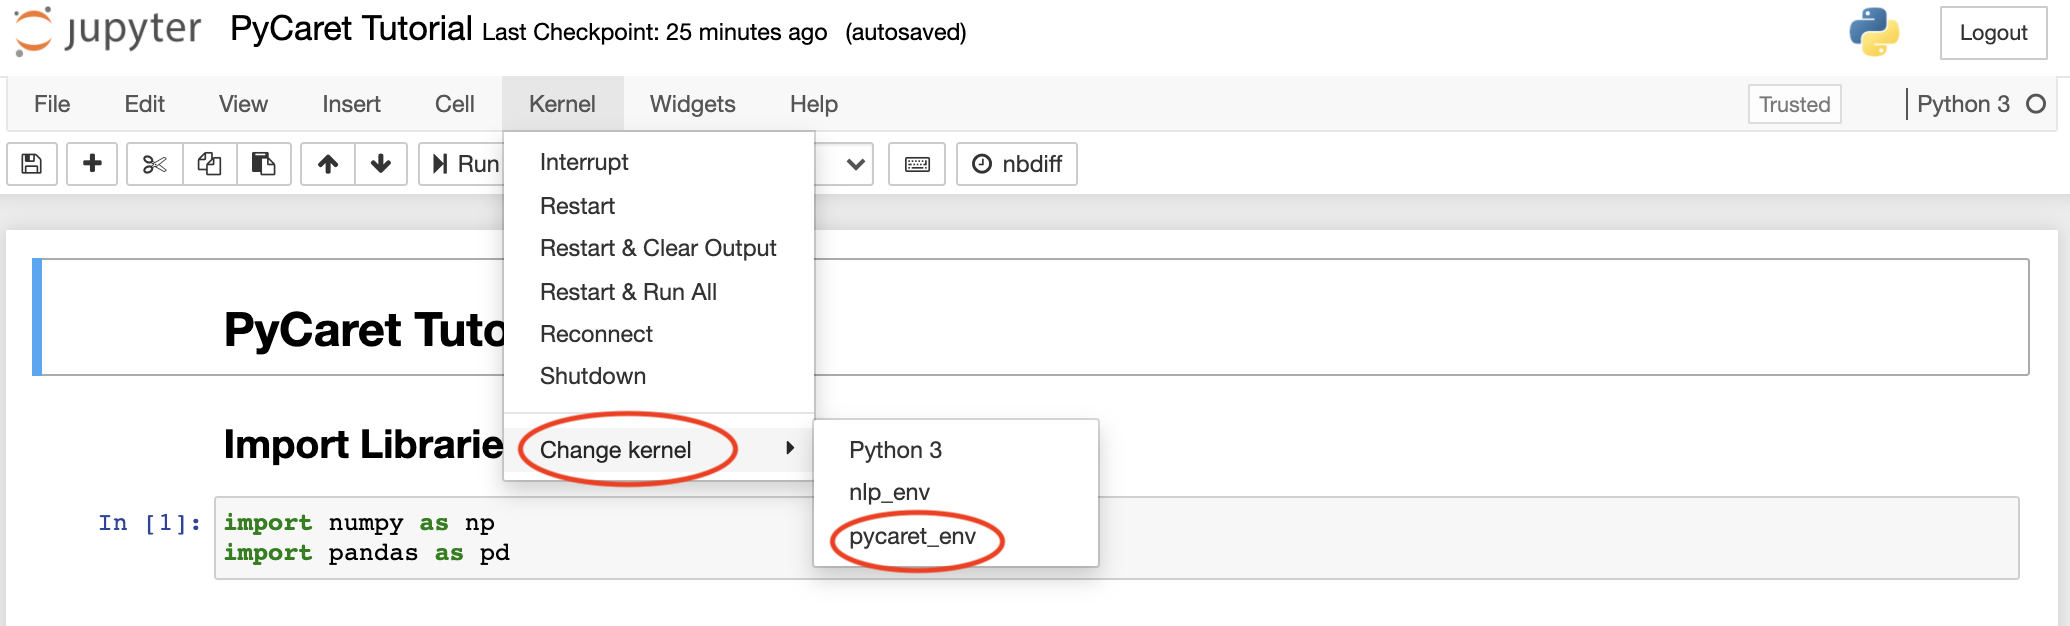

In [10]:
from IPython.display import Image
Image(filename='env.png', width = 400)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Data
## Reading the Data

For this demo, use the [California Housing Prices Dataset](https://www.kaggle.com/camnugent/california-housing-prices?select=housing.csv) available on Kaggle.

In [2]:
housing_data = pd.read_csv('housing.csv')
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The output provides an idea of what the data looks like. The data contains mostly numerical features with one categorical feature for the proximity of each house to the ocean. The target column is `median_house_value`. The entire dataset contains a total of 20,640 observations.

# Initializing the Experiment

Initializing a PyCaret experiment preprocesses the data and enables logging for all of the models that will be trained.

Running the code preprocesses the data and then produces a dataframe with the options for the experiment.

In [4]:
# !conda install -c conda-forge scikit-plot
from pycaret.regression import *
import time

In [5]:
print(pycaret.__version__)

2.3.0


In [6]:
reg_experiment = setup(housing_data, 
                       target = 'median_house_value', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_housing')

,Description,Value
0,session_id,123
1,Target,median_house_value
2,Original Data,"(20640, 10)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14447, 13)"


## Comparing Baseline Models

Compare different baseline models at once to find the model that achieves the best K-fold cross-validation performance with `compare_models`  as shown in the code below.  XGBoost has been excluded for demonstration purposes.

The function produces a data frame with the performance statistics for each model and highlights the metrics for the best performing model, which in this case was the CatBoost regressor.

In [7]:
best_model = compare_models(exclude=['xgboost'], fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,31000.5953,2200017181.9057,46885.7986,0.8349,0.2311,0.1723,4.1260
lightgbm,Light Gradient Boosting Machine,32451.3493,2362163127.6538,48582.4247,0.8228,0.2381,0.1807,0.0540
rf,Random Forest Regressor,33072.4135,2566864379.1811,50654.4931,0.8074,0.2443,0.1841,1.1540
et,Extra Trees Regressor,35715.2657,2858839641.0988,53460.6235,0.7855,0.2549,0.1982,0.6580
gbr,Gradient Boosting Regressor,39002.0759,3147927887.3150,56090.0139,0.7639,0.2736,0.2185,0.4440
lr,Linear Regression,50194.2102,4765779763.2000,69026.2391,0.6426,0.3907,0.2888,0.5820
lasso,Lasso Regression,50194.5938,4765787443.2000,69026.2953,0.6426,0.3906,0.2888,0.3780
ridge,Ridge Regression,50196.5297,4766063923.2000,69028.3344,0.6426,0.3905,0.2888,0.0100
lar,Least Angle Regression,50194.1769,4765780410.8665,69026.2423,0.6426,0.3907,0.2888,0.0080
llar,Lasso Least Angle Regression,50179.0738,4766693415.5519,69032.5877,0.6425,0.3801,0.2881,0.0080


## Creating the Model

Train a model in just a single line of code with PyCaret. The create_model function simply requires a string corresponding to the type of model that you want to train. A complete list of acceptable strings and the corresponding regression models on the [PyCaret documentation page](https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.create_model) for this function.


In [8]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29879.4353,1932405073.6177,43959.1296,0.8661,0.2151,0.1624
1,30345.5989,1999661259.9516,44717.5722,0.8514,0.2162,0.1624
2,31201.0130,2262051471.8058,47561.0289,0.8303,0.2275,0.1691
3,30900.7440,2348479575.7192,48461.1141,0.8339,0.2280,0.1662
4,29473.5750,1902271614.7240,43615.0389,0.8629,0.2145,0.1631
5,31846.3307,2258649894.6077,47525.2553,0.8134,0.2424,0.1834
6,30960.0968,2145856068.7498,46323.3858,0.8368,0.2375,0.1799
7,30581.9802,2119416670.4346,46037.1227,0.8399,0.2353,0.1750
8,31535.4497,2338779487.4424,48360.9293,0.8188,0.2373,0.1759
9,30843.4771,2261619659.2282,47556.4891,0.8238,0.2353,0.1724


The create_model function produces the dataframe above with cross-validation metrics for the trained CatBoost model.

## Hyperparameter Tuning

Optimize with hyperparameter tuning. With just one line of code, tune the hyperparameters of this model.

The most important results, in this case, the average metrics, are highlighted in yellow.

In [9]:
tuned_catboost = tune_model(catboost, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30539.9095,2006420707.5684,44793.0877,0.8609,0.2188,0.1653
1,30351.6498,2015802356.8178,44897.6877,0.8502,0.2197,0.1641
2,31935.4001,2372326615.5410,48706.5357,0.8220,0.2344,0.1735
3,31270.3306,2353651288.6420,48514.4441,0.8335,0.2278,0.1671
4,30302.9601,1968783008.0403,44370.9703,0.8582,0.2267,0.1719
5,31985.2374,2309542189.6676,48057.6965,0.8092,0.2470,0.1853
6,31564.3792,2214167398.0409,47054.9402,0.8316,0.2449,0.1856
7,31448.0218,2211084955.9852,47022.1752,0.8330,0.2419,0.1815
8,32082.3710,2409288912.6871,49084.5079,0.8133,0.2487,0.1825
9,31275.2608,2293979598.7290,47895.5071,0.8213,0.2394,0.1738


## Visualizing the Model's Performance

There are many plots available with PyCaret to visualize a model’s performance. PyCaret uses another high-level library called `Yellowbrick` for building these visualizations.

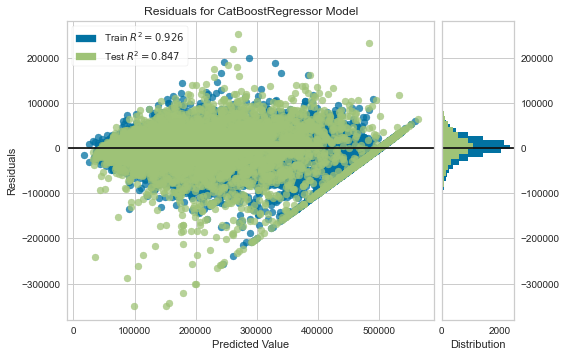

In [10]:
plot_model(tuned_catboost)

Residual Plot:  The plot_model function will produce a residual plot by default for a regression model as demonstrated below.

Prediction Error:  Visualize the predicted values against the actual target values by creating a prediction error plot.

The plot is particularly useful because it produces a visual representation of the R² coefficient for the CatBoost model. In a perfect scenario (R² = 1), where the predicted values exactly matched the actual target values, this plot would simply contain points along the dashed identity line.

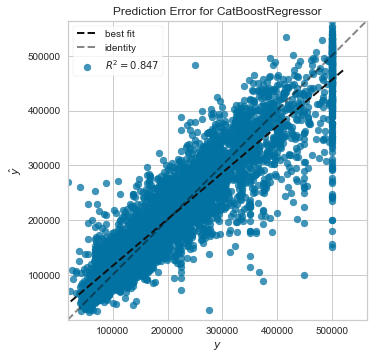

In [11]:
plot_model(tuned_catboost, plot = 'error')

Feature Importance:  Visualize the feature importances for a model as shown below.

`median_income` is the most important feature when predicting the price of a house. Since this feature corresponds to the median income in the area in which a house was built, this evaluation makes perfect sense. Houses built in higher-income areas are likely more expensive than those in lower-income areas.

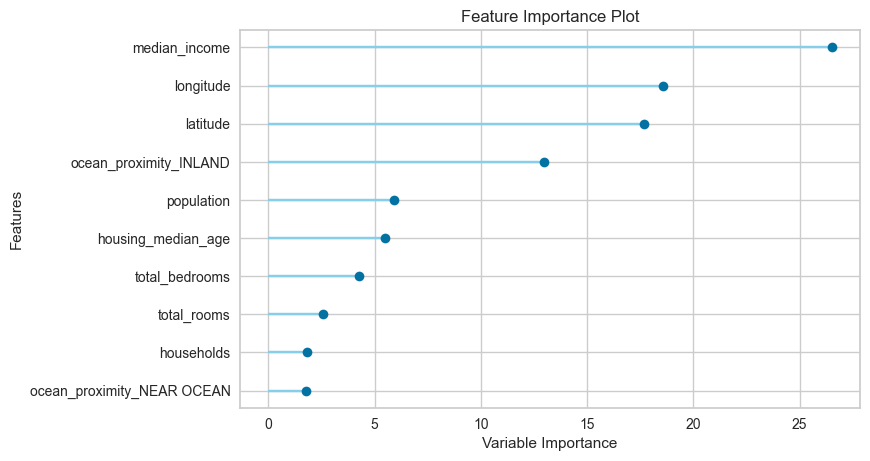

In [12]:
plot_model(tuned_catboost, plot = 'feature')

Evaluating the Model Using All Plots:  Create multiple plots for evaluating a model with `evaluate_model`.

In [13]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpreting the Model

`interpret_model` is a useful tool for explaining the predictions of a model. This function uses a library for explainable machine learning called SHAP.  With just one line of code,  create a SHAP beeswarm plot for the model.

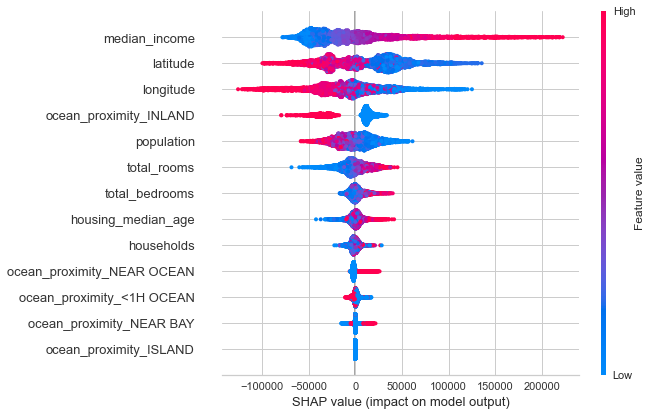

In [14]:
interpret_model(tuned_catboost)

## AutoML

PyCaret also has a function for running automated machine learning (AutoML). Specify the loss function or metric that to optimize and then just let the library take over.

The AutoML model also happens to be a CatBoost regressor, which we can confirm by printing out the model.


In [15]:
automl_model = automl(optimize = 'MAE')
automl_model

## Generating Predictions

`predict_model` generates predictions by either using data from the experiment or new unseen data.

`predict_model` produces predictions for the holdout datasets used for validating the model during cross-validation. The code also gives a dataframe with performance statistics for the predictions generated by the AutoML model.

`Label` represents the predictions generated by the AutoML model. It also produces predictions on the entire dataset as demonstrated in the code below.


In [17]:
pred_holdouts = predict_model(automl_model)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,29557.2726,1959196967.3202,44262.8170,0.8518,0.2249,0.1678


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,Label
0,-122.639999,38.240002,40.0,1974.0,410.0,1039.0,398.0,3.7917,1.0,0.0,0.0,0.0,0.0,151600.0,204245.853674
1,-119.050003,36.090000,9.0,3297.0,568.0,1749.0,568.0,4.0217,0.0,1.0,0.0,0.0,0.0,99200.0,98050.988356
2,-116.980003,32.849998,12.0,3570.0,713.0,3321.0,666.0,4.0882,1.0,0.0,0.0,0.0,0.0,134500.0,145348.324627
3,-118.419998,34.200001,27.0,3201.0,970.0,3403.0,948.0,2.2377,1.0,0.0,0.0,0.0,0.0,231700.0,177355.589219
4,-118.470001,34.009998,41.0,2704.0,557.0,1047.0,478.0,4.4211,1.0,0.0,0.0,0.0,0.0,462900.0,422591.317506


In [18]:
new_data = housing_data.copy()
new_data.drop(['median_house_value'], axis=1, inplace=True)
predictions = predict_model(automl_model, data=new_data)
predictions.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Label
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,413088.196896
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,430391.699993
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,398224.537603
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,338421.618174
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,290095.235317


## Saving the Model

`PyCaret` saves trained models with `save_model`. This function saves the transformation pipeline for the model to a pickle file.

In [19]:
save_model(automl_model, model_name='automl-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='median_house_value',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='median_house_value')),
                 ('fix_perfect', Remove_100(target='median_house_value')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_se

Load the saved AutoML model with `load_model`.

In [20]:
loaded_model = load_model('automl-model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='median_house_value',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='median_house_value')),
                ('fix_perfect', Remove_100(target='median_house_value')),
                ('clean_names', Clean_Colum_Na

`PyCaret` not only saved the trained model at the end of the pipeline but also the feature engineering and data preprocessing steps at the beginning of the pipeline. This is a production-ready machine learning pipeline in a single file.

## MLFlow UI

Another feature of `PyCaret` is that it can log and track machine learning experiments with a machine learning lifecycle tool called MLfLow. Running the command below will launch the MLflow user interface in a browser from localhost.

MLflow keeps track of the runs for different models for PyCaret experiments. View the performance metrics as well as the running times for each run.

localhost:5000

In [21]:
!mlflow ui

^C


# `pycaret` Pros & Cons

## Pros
- Low-code library.
- Great for simple, standard tasks and general-purpose machine learning.
- Provides support for regression, classification, natural language processing, clustering, anomaly detection, and association rule mining.
- Makes it easy to create and save complex transformation pipelines for models.
- Makes it easy to visualize the performance of your model.

## Cons
- PyCaret is not ideal for text classification because the NLP utilities are limited to topic modeling algorithms.
- PyCaret is not ideal for deep learning and doesn’t use Keras or PyTorch models.
- You can’t perform more complex machine learning tasks such as image classification and text generation with PyCaret.
- By using PyCaret, you are sacrificing a certain degree of control for simple and high-level code.